# Australia Wildfires 

<b>Time Range: September- December 2019 <b>

<b>Event Type: Wildfire <b>

<b>Event: Australia Wildfire <b>


Wildfires in Australia have been raging on for months, starting in September 2019 and intensifying to levels that caused a state of emergency to be declared in November 2019. By December 2019, more than 100,000 square miles of New South Wales, Australia’s most populous state, had been charred, impacting bushland, wooded areas, national parks, suburban homes, and creating thick smoke plumes in urban hubs. 

Each year, there is a fire season during the Australian summer, when hot, dry conditions make it easier for fires to start and spread. However, Australia has been experiencing one of its worst droughts in decades, and a heatwave in December broke the record for highest nationwide average temperature. These factors, coupled with strong winds, have made the fires and smoke spread more rapidly.  

Recently, a pair of bushfires in Southeastern Australia merged into a “megafire”, engulfing nearly 2,300 square miles (1.5 million acres). Some of the areas the fires have been burning in could take decades or longer to recover, and push some species to the brink of extinction. All these fires emit smoke, consisting of a combination of thousands of compounds, including greenhouse gases. The fires are estimated to have pumped around 400 million tons of carbon into the atmosphere.  

Smoke from the fires has reached the lower stratosphere and traveled as far away as Chile, and is also darkening snow on New Zealand’s mountaintops, as well as causing air quality issues possibly accelerating their rate of melting. 

The image below shows a particularly large smoke plume from the Australian fires travelling across the Pacific Ocean as captured by the CALIPSO satellite.


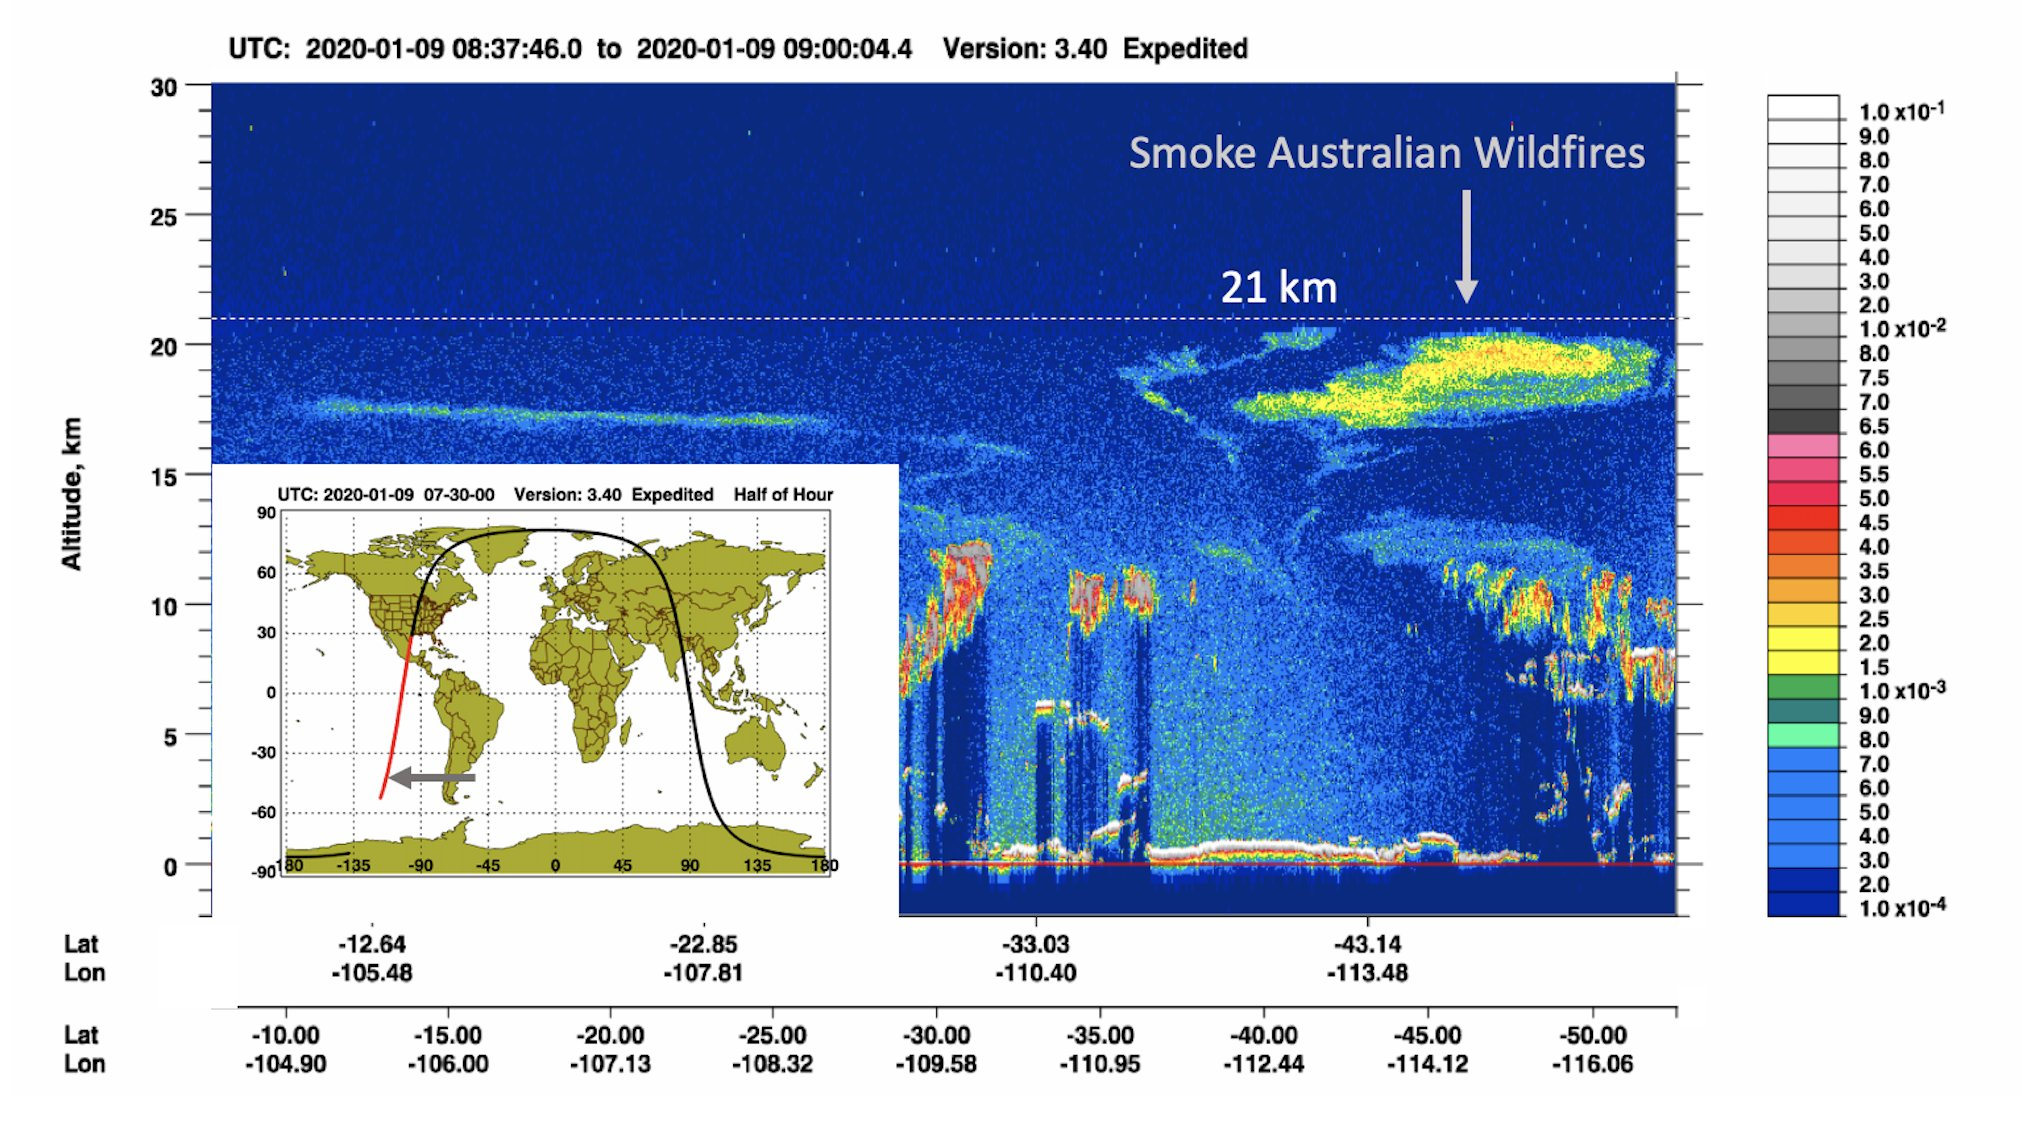

<i>Image Credit: Jean Paul Vernier, NASA Langley Research Center <i>

<B>The code below uses data from MISR to visualize the effect of aerosols from the wildfires in the atmosphere.<B>

In [2]:
# This cell gathers and initializes the libraries that we need to support and run our below code.

from __future__ import division
from matplotlib import animation
from mpl_toolkits.basemap import Basemap
from mpl_toolkits.mplot3d import Axes3D
from PIL import Image
from matplotlib import colors
import matplotlib as mpl
import matplotlib.pyplot as plt
from astropy.time import Time
import requests
import numpy as np
import io
import h5py
import time
import re
import os.path
import os
from pyhdf.SD import SD, SDC
import warnings; warnings.simplefilter('ignore')

In [40]:
# The code in this cell gets the file we will analyze. It will either download the file from the OPeNDAP serive
# or notify you that you already have the file on your machine, and show the file path.


#This part grabs the file from OPeNDAP.
FILE_NAME='MISR_AM1_CGAS_FIRSTLOOK_NOV_2019_F15_0032.nc'
url = 'https://opendap.larc.nasa.gov:443/opendap/MISR/MI3MAENF.002/2019.11.01/MISR_AM1_CGAS_FIRSTLOOK_NOV_2019_F15_0032.nc'
if not os.path.isfile(FILE_NAME):
    try:
        print("Attempting to download: "+FILE_NAME+" from the ASDC OPeNDAP service...")
        r = requests.get(url, allow_redirects=True)
        open(FILE_NAME, 'wb').write(r.content)
        if os.path.isfile(FILE_NAME):
            print("Success! The full path to the data file is: "+os.path.abspath(FILE_NAME))
    except Exception as e:
            print("Error: " + str(e))
            
#This part tells you if you have downloaded the file and it is already on your machine.
else:
    print('Found '+os.path.abspath(FILE_NAME)+' on your system.\nSkipping the download process from the ASDC OPeNDAP Service.')


Found /Users/spaul2/Desktop/SOT Outreach/Jupyter Notebooks/MISR_AM1_CGAS_FIRSTLOOK_NOV_2019_F15_0032.nc on your system.
Skipping the download process from the ASDC OPeNDAP Service.


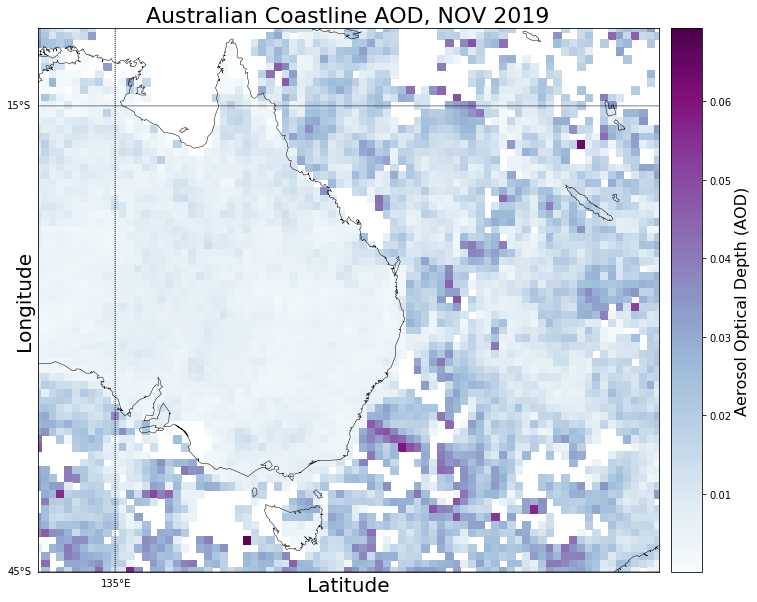

In [51]:
#This cell is where the magic (well, analysis) happens.


with h5py.File(FILE_NAME, mode='r') as f:
    
    # Fisrt we identify the data field we are working with, in this case
    # monthly mean aerosol optical depth.
    var = f['/Aerosol_Parameter_Average/Medium_Mode_Aerosol_Optical_Depth']
    
    # Once we've identified it, read the data and grab the spatial information from the file.
    data = var[:,:,2].astype(np.double)
    lat = f['/Aerosol_Parameter_Average/Latitude'][:]
    lon = f['/Aerosol_Parameter_Average/Longitude'][:]

    # The library we are using, h5py, doesn't automatically turn the data into a masked array, 
    # so we do it ourselves to help us display it on a map.
    fillvalue = var.attrs['_FillValue']
    data[data == fillvalue] = np.nan
    data = np.ma.masked_array(data, np.isnan(data))
    
    # This specifies the image size - you can make it as big or small as you'd like.
    plt.figure(figsize=(14,10))

    # The data we are using is global, so we will render it in the simplest global projection, 
    # "Equidistant Cylindrical Projection". It is one of the projections available through Basemap,
    # and displays the world in lat/lon coordinates.
    m = Basemap(projection='cyl', resolution='l',
            llcrnrlat=-45, urcrnrlat=-10,
            llcrnrlon=130, urcrnrlon=170)
    
    plt.title('Australian Coastline AOD, NOV 2019', fontsize =22)
    plt.xlabel('Latitude',fontsize =20 )
    plt.ylabel('Longitude', fontsize =20)
    
    # Now we will add the content to the map, including outlines of land and selecting a color map
    # that best displays our data.
    m.drawcoastlines(linewidth=0.5)
    m.drawparallels(np.arange(-45, 91, 30), labels=[1, 0, 0, 0])
    m.drawmeridians(np.arange(-180, 181, 45), labels=[0, 0, 0, 1])
    m.pcolormesh(lon, lat, data, latlon=True)
    # This line below changes the colors on the colormap - refer to matplotlib documentation for more choices.
    mpl.rcParams['image.cmap'] = 'BuPu'
    cb = m.colorbar()
    cb.ax.set_ylabel('Aerosol Optical Depth (AOD)', fontsize=16)
    
    
  

To get additional information about which MISR data to use, visit the MISR browse tool at https://l0dup05.larc.nasa.gov/MISR_BROWSE/

Start by selecting your region and date of interest:
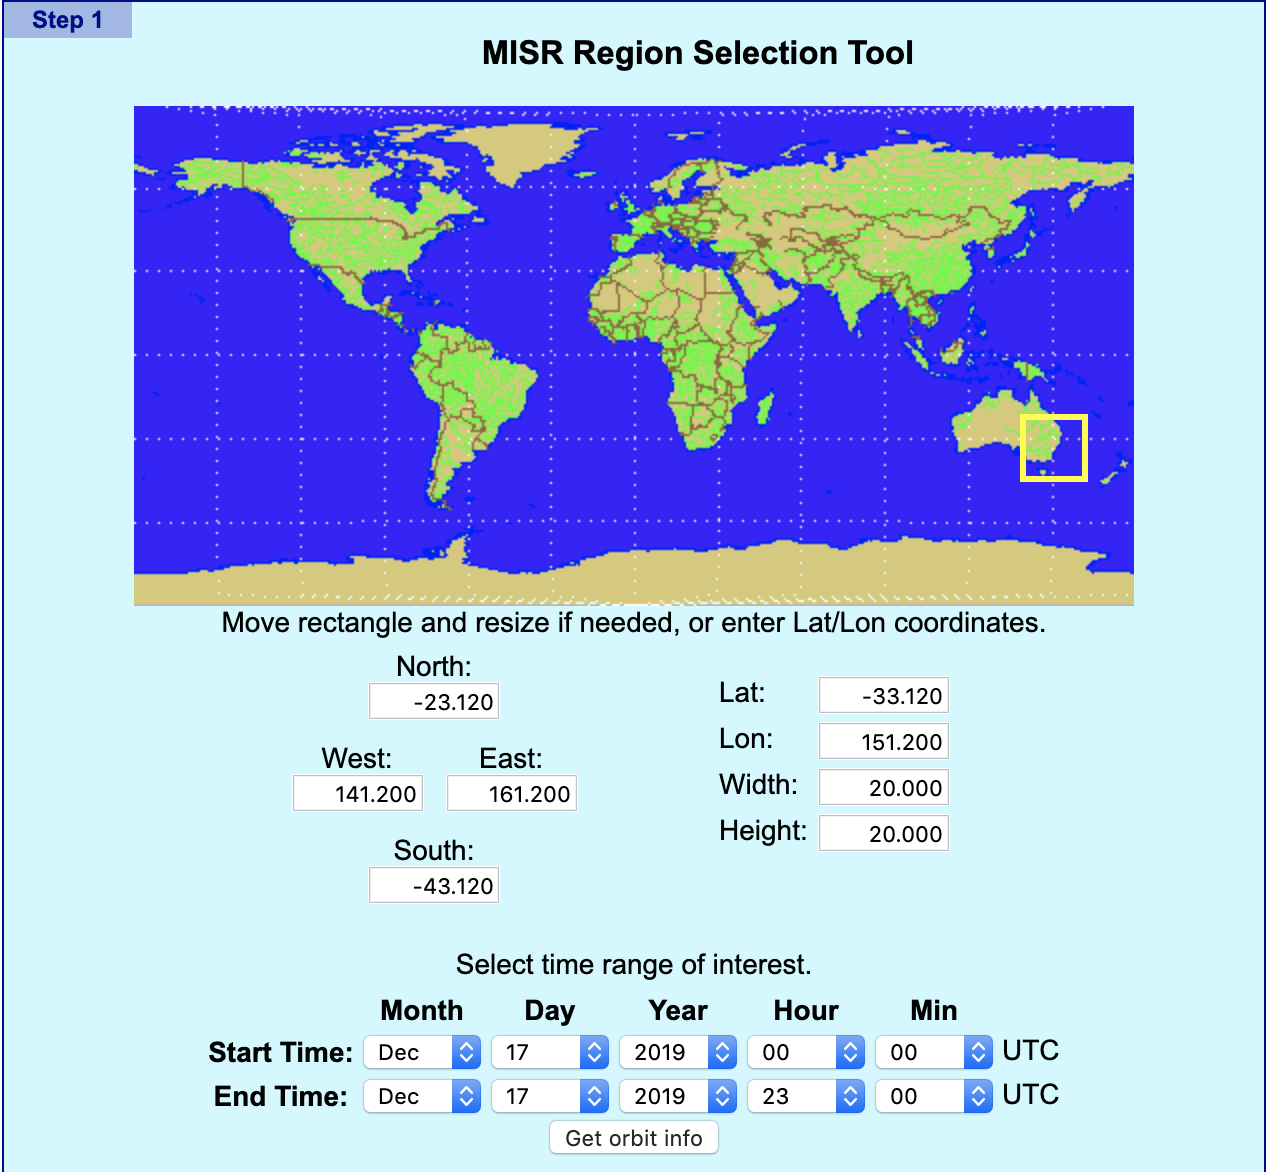

You will be shown any MISR paths for that given date and location:
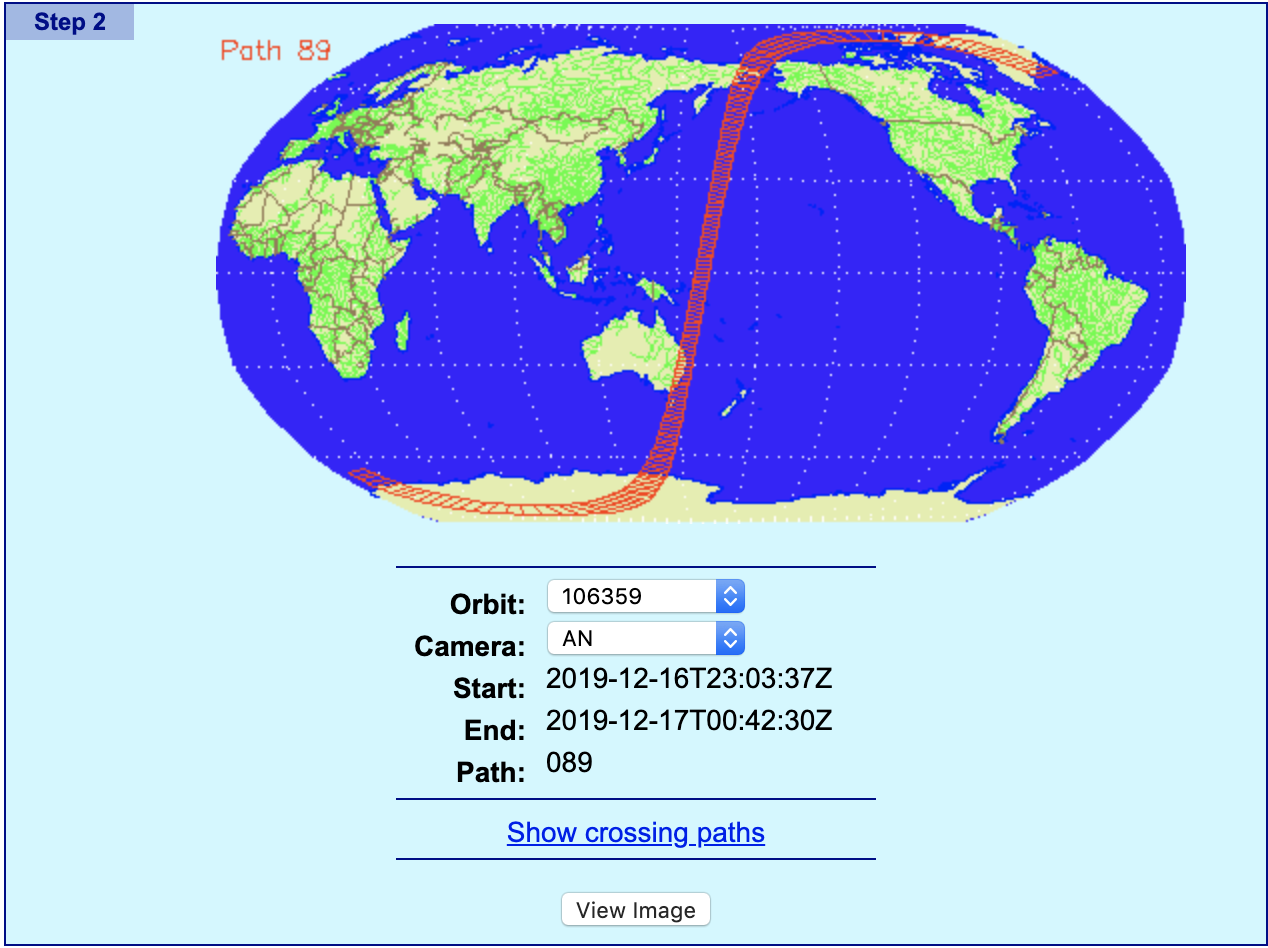

And can then view an image to see if the features you are interested in appear in the path. For example, smoke plumes from the Australian wildfires are visible in the image generated from this MISR path:

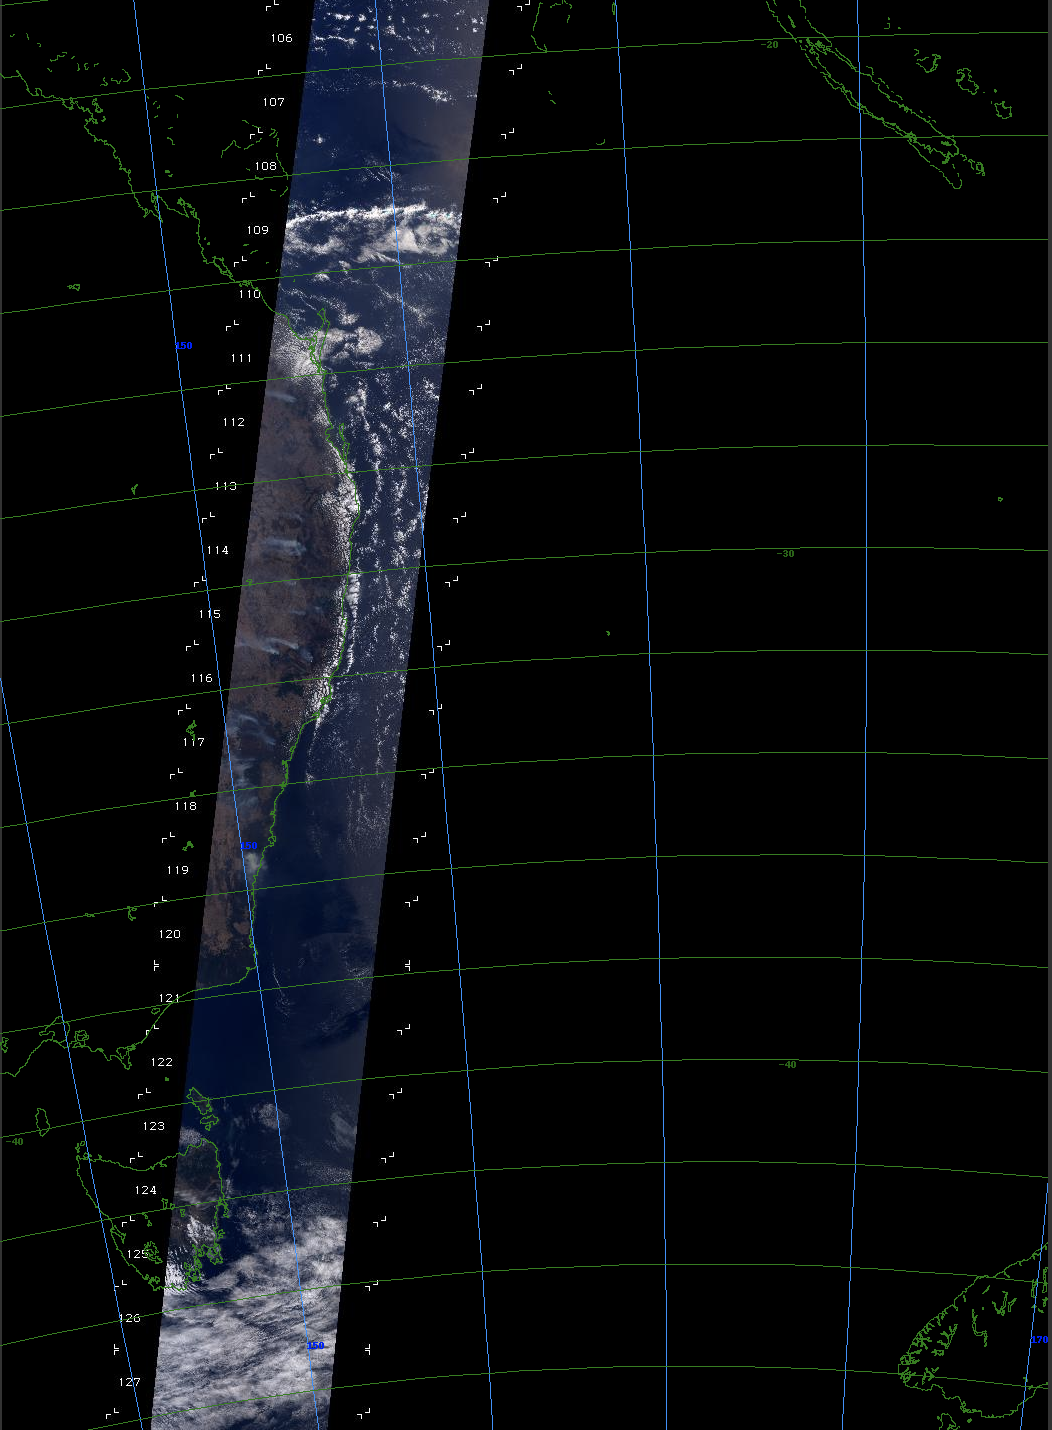
